In [70]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

ita_08 = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\italia8mattina.csv")
ita_08

,Unnamed: 0,TSTOT.PrezzoITA,TSTOT.ConsumiITA,TSTOT.GradiITA,TSTOT.BankHolidayITA,TSTOT.EndYearITA,TSTOT.AugustBorderITA,TSTOT.EndYearITA.1,TSTOT.AugustCenterITA,lunedi,martedi,mercoledi,giovedi,venerdi,sabato,domenica
0,0,61.10,21393.44,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,77.81,31193.08,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,81.54,32828.72,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,83.08,33032.88,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,84.42,32607.85,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,31.40,18366.95,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,1456,36.52,19012.19,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1457,37.86,19565.76,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,1458,25.58,20564.55,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
ita_08 = ita_08.drop(ita_08.columns[[0]], axis=1)
del ita_08["TSTOT.EndYearITA.1"]
ita_08.columns = ["Prezzo","Consumo","Gradi","BankH","EndYear","AugustB","AugustC","lunedi","martedi","mercoledi","giovedi","venerdi","sabato","domenica"]
ita_08.Gradi = ita_08.Gradi.shift(1)
ita_08.Prezzo = ita_08.Prezzo.shift(1)
ita_08["Giorno"] = ["lun" if lu==1 else "mar" if ma==1 else "mer" if me==1 else "gio" if gi==1 else "ven" if ve==1 else "sab" if sa==1 else "dom" for lu,ma,me,gi,ve,sa,do in zip(ita_08["lunedi"],ita_08["martedi"],ita_08["mercoledi"],ita_08["giovedi"],ita_08["venerdi"],ita_08["sabato"],ita_08["domenica"])]

del ita_08["lunedi"]
del ita_08["martedi"]
del ita_08["mercoledi"]
del ita_08["giovedi"]
del ita_08["venerdi"]
del ita_08["sabato"]
del ita_08["domenica"]
ita_08 = ita_08.dropna()

In [72]:
ita_08

,Prezzo,Consumo,Gradi,BankH,EndYear,AugustB,AugustC,Giorno
1,61.10,31193.08,-1.0,0.0,1.0,0.0,0.0,lun
2,77.81,32828.72,5.0,0.0,1.0,0.0,0.0,mar
3,81.54,33032.88,2.0,0.0,1.0,0.0,0.0,mer
4,83.08,32607.85,0.0,0.0,1.0,0.0,0.0,gio
5,84.42,24338.01,0.0,1.0,0.0,0.0,0.0,ven
...,...,...,...,...,...,...,...,...
1455,31.90,18366.95,7.0,0.0,0.0,0.0,0.0,dom
1456,31.40,19012.19,5.0,0.0,0.0,0.0,0.0,lun
1457,36.52,19565.76,5.0,0.0,1.0,0.0,0.0,mar
1458,37.86,20564.55,1.0,0.0,1.0,0.0,0.0,mer


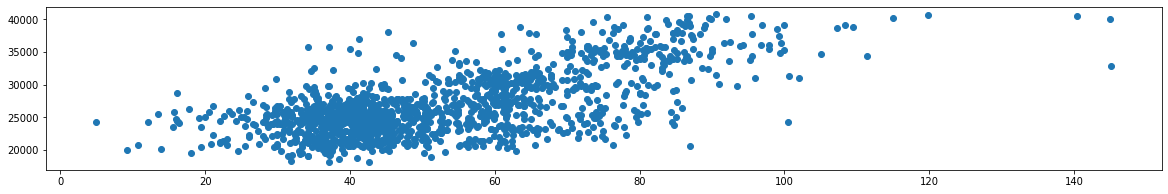

In [73]:
import matplotlib.pyplot as plt

plt.scatter(ita_08["Prezzo"], ita_08["Consumo"])
plt.show()

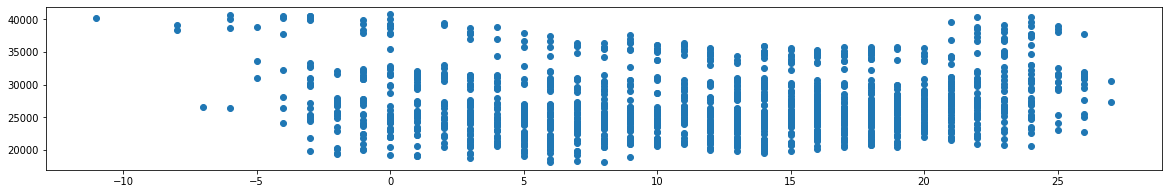

In [74]:
plt.scatter(ita_08["Gradi"], ita_08["Consumo"])
plt.show()

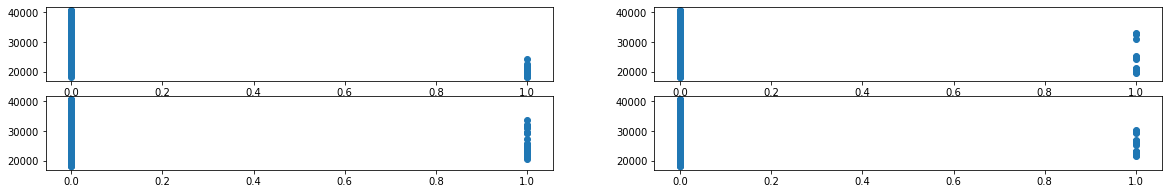

In [75]:
plt.subplot(221)
plt.scatter(ita_08["BankH"], ita_08["Consumo"])
plt.subplot(222)
plt.scatter(ita_08["EndYear"], ita_08["Consumo"])
plt.subplot(223)
plt.scatter(ita_08["AugustB"], ita_08["Consumo"])
plt.subplot(224)
plt.scatter(ita_08["AugustC"], ita_08["Consumo"])
plt.show()

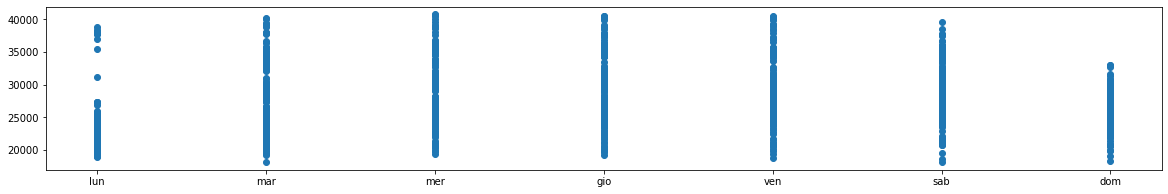

In [76]:
plt.scatter(ita_08["Giorno"], ita_08["Consumo"])
plt.show()

In [77]:
ita_08["Gradi2"] = ita_08["Gradi"]**2

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

def preprocess_scale(X, scaler=None):
    if not scaler:  
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

def preprocess_OneHot(X,encoder=None):
    if not encoder:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(X)
    X = encoder.transform(X).toarray()
    return X, encoder

def preprocessing(X, OH_encoder=None, scaler=None):
    X_categorical = X["Giorno"].to_numpy().reshape(-1, 1)
    X_numeric = X[["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC"]] 
    X_categorical, OH_encoder = preprocess_OneHot(X_categorical, OH_encoder)
    X_numeric, scaler = preprocess_scale(X_numeric, scaler)
    
    dim_X_cat = X_categorical.shape[1]
    dim_X_num = X_numeric.shape[1]
    X = np.ndarray(shape=(X.shape[0],dim_X_cat+dim_X_num))
    # print(X_categorical.shape[1])
    # print(X_numeric.shape[1])

    X[:,0:dim_X_num] = X_numeric
    X[:,dim_X_num:dim_X_num+dim_X_cat] = X_categorical
    return X, OH_encoder, scaler

def metrics(X_test,y_test,regressor):
    #R2
    R2 = regressor.score(X=X_test,y=y_test.ravel())
    y_pred = regressor.predict(X_test)
    #RMSE
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    #MAE
    MAE = mean_absolute_error(y_test, y_pred)
    return R2,RMSE,MAE

def print_result(X_test,y_test,reg,cross=2):
    R2 = reg.score(X=X_test,y=y_test.ravel())
    y_pred = reg.predict(X_test)
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    MAE = mean_absolute_error(y_test, y_pred)
    print("Test Set Measures:")
    print("  R2 = %.2f" % R2)
    print("  RMSE = %.2f" % RMSE)
    print("  MAE = %.2f" % MAE)
    print()
    print("Cross validation with %s foldes:" % cross)
    scores_R2 = cross_val_score(reg,X_test,y_test,cv=cross, scoring='r2')
    scores_RMSE = cross_val_score(reg,X_test,y_test,cv=cross, scoring='neg_root_mean_squared_error')
    scores_MAE = cross_val_score(reg,X_test,y_test,cv=cross, scoring='neg_mean_absolute_error')
    print("  R2 = %.2f (+/- %.2f)" % (scores_R2.mean(), scores_R2.std()*1.96))
    print("  RMSE = %.2f (+/- %.2f)" % (-scores_RMSE.mean(), scores_RMSE.std()*1.96))
    print("  MAE = %.2f (+/- %.2f)" % (-scores_MAE.mean(), scores_MAE.std()*1.96))    
    
    if hasattr(reg, 'coef_'):
        print()
        print("Coeff:")
        print(reg.coef_)
    if hasattr(reg, 'intercept_'):
        print()
        print("Intercept:")
        print(reg.intercept_)

def plot_result(X_train,X_test,y_train,y_test,regressor,scaler,onlyTest = False):
    
    y_test_p = regressor.predict(X_test)
    y_test = scaler.inverse_transform(y_test)
    y_test_p = scaler.inverse_transform(y_test_p)
    
    if not(onlyTest):
        y_train_p = regressor.predict(X_train)    
        y_train = scaler.inverse_transform(y_train)
        y_train_p = scaler.inverse_transform(y_train_p)
        forcast = np.concatenate((y_train_p,y_test_p))
        real = np.concatenate((y_train,y_test))
    else:
        forcast = y_test_p
        real = y_test
        
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(real, color = 'blue', label = 'Real Test Set')
    plt.plot(forcast, linewidth=1,color = 'red', label = 'Predicted Test Set')
    plt.title('Consumi Energetici')
    plt.xlabel('Time')
    plt.ylabel('Consumo')
    plt.legend()
    plt.show()
    

In [111]:
X_train, X_test, y_train, y_test = train_test_split(ita_08[["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC","Giorno"]], ita_08["Consumo"], test_size=0.2, random_state=42)

In [112]:
X_train, OH_encoder, scaler = preprocessing(X_train)
y_train, scaler_y = preprocess_scale(y_train.to_numpy().reshape(-1, 1))

X_test,_,_ = preprocessing(X_test,OH_encoder,scaler)
y_test,_ = preprocess_scale(y_test.to_numpy().reshape(-1, 1), scaler_y)

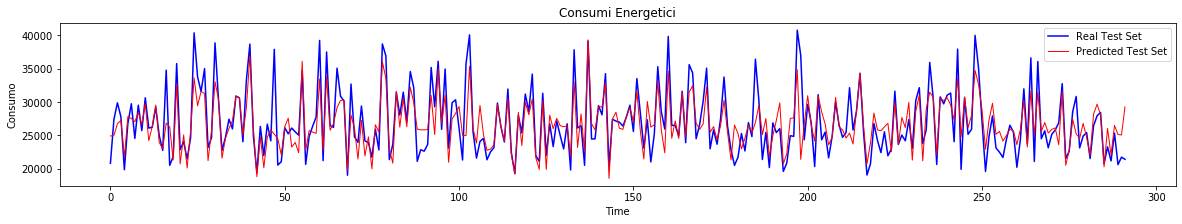

Test Set Measures:
  R2 = 0.67
  RMSE = 0.63
  MAE = 0.46

Cross validation with 10 foldes:
  R2 = 0.64 (+/- 0.31)
  RMSE = 0.62 (+/- 0.27)
  MAE = 0.48 (+/- 0.15)

Coeff:
[ 0.63198876 -0.31226146  0.33785022 -0.20527244 -0.0907312  -0.10043564
 -0.12736731 -0.45055078  0.33014176 -0.86264021  0.18327837  0.26736914
  0.22762295  0.30477876]

Intercept:
0.0062603218128410324


In [113]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train.ravel())
#R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

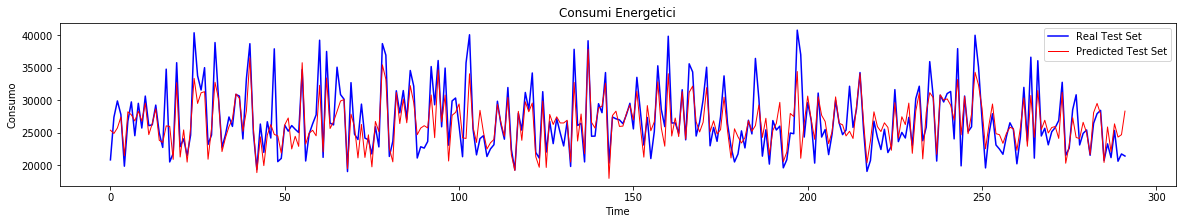

Test Set Measures:
  R2 = 0.66
  RMSE = 0.64
  MAE = 0.46

Cross validation with 10 foldes:
  R2 = 0.63 (+/- 0.29)
  RMSE = 0.64 (+/- 0.27)
  MAE = 0.48 (+/- 0.14)

Coeff:
[[ 0.61542458 -0.27493056  0.3126479  -0.19853702 -0.11714944 -0.08677995
  -0.11567777 -0.31791428  0.32176355 -0.89082692  0.02904282  0.27235584
   0.28339097  0.30218802]]

Intercept:
[-0.03385189]


In [114]:
from sklearn.svm import SVR
#Kernel Lineare
reg = SVR(kernel='linear')
reg.fit(X_train,y_train.ravel())
#R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

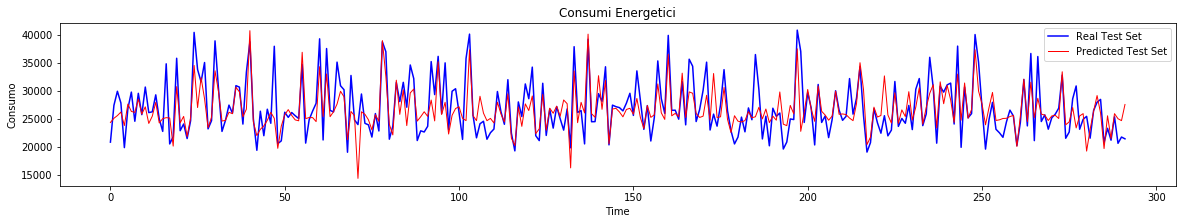

Test Set Measures:
  R2 = 0.58
  RMSE = 0.71
  MAE = 0.51

Cross validation with 10 foldes:
  R2 = 0.40 (+/- 0.21)
  RMSE = 0.82 (+/- 0.21)
  MAE = 0.63 (+/- 0.16)

Intercept:
[-0.25705935]


In [115]:
#Kernel Polinomiale
reg = SVR(kernel='poly')
reg.fit(X_train,y_train.ravel())
#R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

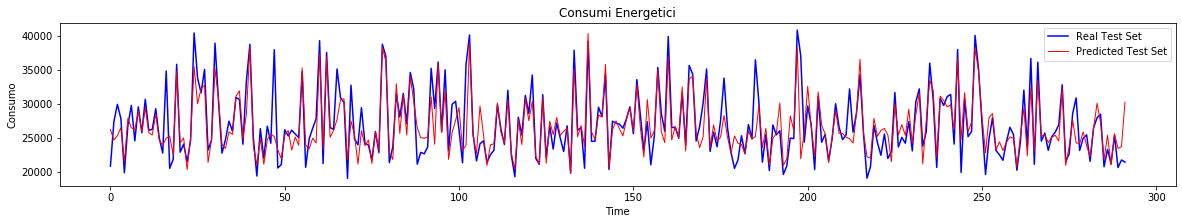

Test Set Measures:
  R2 = 0.72
  RMSE = 0.58
  MAE = 0.38

Cross validation with 10 foldes:
  R2 = 0.67 (+/- 0.32)
  RMSE = 0.59 (+/- 0.33)
  MAE = 0.41 (+/- 0.17)

Intercept:
[-0.12331459]


In [116]:
#Kernel Gaussiano
reg = SVR(kernel='rbf')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

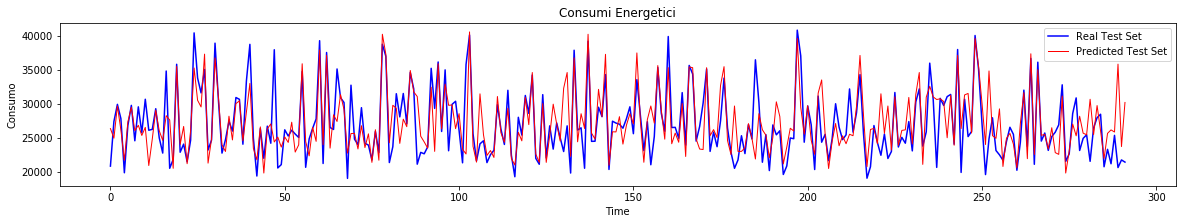

Test Set Measures:
  R2 = 0.50
  RMSE = 0.77
  MAE = 0.51

Cross validation with 10 foldes:
  R2 = 0.45 (+/- 0.28)
  RMSE = 0.78 (+/- 0.25)
  MAE = 0.52 (+/- 0.16)


In [117]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 2, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

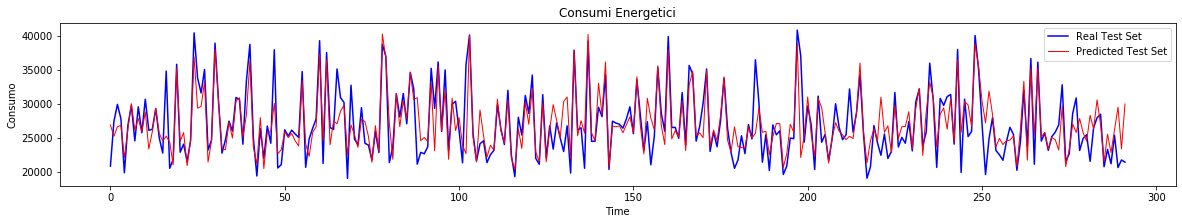

Test Set Measures:
  R2 = 0.66
  RMSE = 0.64
  MAE = 0.42

Cross validation with 10 foldes:
  R2 = 0.57 (+/- 0.34)
  RMSE = 0.68 (+/- 0.28)
  MAE = 0.47 (+/- 0.15)


In [118]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

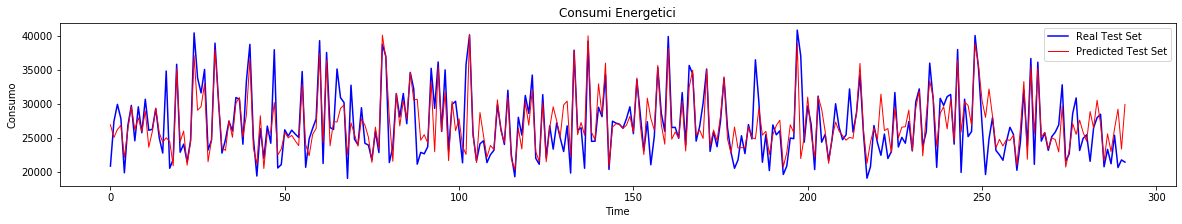

Test Set Measures:
  R2 = 0.66
  RMSE = 0.64
  MAE = 0.42

Cross validation with 10 foldes:
  R2 = 0.57 (+/- 0.36)
  RMSE = 0.68 (+/- 0.28)
  MAE = 0.47 (+/- 0.15)


In [119]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

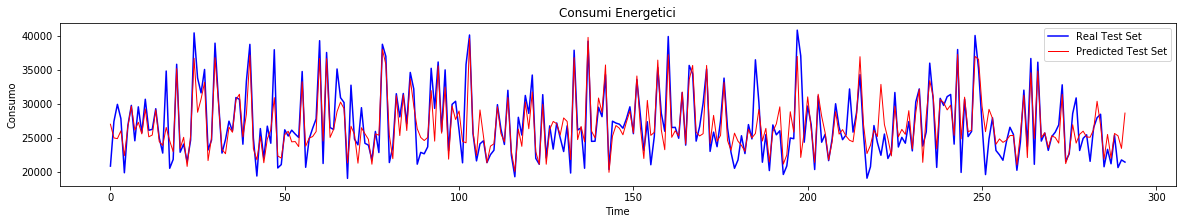

Test Set Measures:
  R2 = 0.72
  RMSE = 0.57
  MAE = 0.39

Cross validation with 10 foldes:
  R2 = 0.61 (+/- 0.49)
  RMSE = 0.62 (+/- 0.33)
  MAE = 0.44 (+/- 0.19)


In [120]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100,reg_lambda=2,gamma=0.1,max_depth=3)
reg.fit(X_train, y_train)
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(X_test,y_test,reg,10)

In [121]:
pd.DataFrame(reg.feature_importances_.reshape(1, -1), columns=["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC","G1","G2","G3","G4","G5","G6","G7"])

,Prezzo,Gradi,Gradi2,BankH,EndYear,AugustB,AugustC,G1,G2,G3,G4,G5,G6,G7
0,0.159767,0.028674,0.01349,0.116701,0.044806,0.019889,0.048527,0.200748,0.062689,0.225029,0.01149,0.002655,0.012847,0.05269
